In [1]:
data_path = 'data/ocv_features_normalized_241003.csv'

target_column_name = 'expt_ocv'
primary_column_name = 'original_md_ocv'
#primary_column_name = 'md_ocv'
using_primary_as_training = True

drop_col_list = ["cif_idx",'name']
#drop_col_list = ['SchNet']

self_define_train_test = True

random_seed = 461

#test_proportion = 0.1


In [2]:
# Parameters
file_options = "HOF.csv"
proj_theme = "HOF"
smi_column_name = "smiles"
low_accuracy_column_name = "acc_low"
high_accuracy_column_name = "acc_high"


In [3]:
# Parameters
file_options = "ocv_features_normalized_241003.csv"
proj_theme = "OCV"
drop_col_list = "cif_idx,name"
low_accuracy_column_name = "original_md_ocv"
high_accuracy_column_name = "expt_ocv"
random_seed = "461"

In [4]:
data_path = '../uploads/' + file_options
target_column_name = high_accuracy_column_name
primary_column_name = low_accuracy_column_name
drop_col_list = drop_col_list.split(',')
random_seed = int(random_seed)

In [5]:
from pprint import pprint

import sklearn.datasets
import sklearn.metrics 
from sklearn.model_selection import train_test_split

import autosklearn.regression
import matplotlib.pyplot as plt
import numpy as np

import utils
#importlib.reload(utils)
from utils import evaluation, plot_scatter
from sklearn.metrics import r2_score
import os

In [6]:
save_dir_path = '../static/data/OCV/'

if not os.path.exists(save_dir_path):
    os.makedirs(save_dir_path)

In [7]:
import pandas as pd
df_data = pd.read_csv(data_path,index_col=0)  
df_data.dropna(inplace=True,axis='columns')
df_data

,soc,md_ocv,Li atomic fraction,Li weight fraction,mass per volume,electron per volume,TM atomic fraction,TM weight fraction,anion atomic fraction,anion weight fraction,expt_ocv,name,Li_num,cif_idx,original_md_ocv
0,-1.599913,-2.475244,-1.482048,-1.480253,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,2.80,Li0.5Mn0.5Ti2(PO4)3,0,0,1.8301
1,-1.370409,-2.582961,-1.356713,-1.346305,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,2.77,Li0.5Mn0.5Ti2(PO4)3,16,1,1.7252
2,-1.145005,-2.728671,-1.233149,-1.212905,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,2.76,Li0.5Mn0.5Ti2(PO4)3,32,2,1.5833
3,-0.915502,-2.701151,-1.111320,-1.080048,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,2.75,Li0.5Mn0.5Ti2(PO4)3,48,3,1.6101
4,-0.690097,-2.783197,-0.991189,-0.947732,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,2.73,Li0.5Mn0.5Ti2(PO4)3,64,4,1.5302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.904130,-0.042326,-0.068140,-0.158709,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,3.88,LiVOAsO4,66,11,4.1994
471,1.133633,-0.006900,0.049220,-0.041210,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,3.79,LiVOAsO4,72,12,4.2339
472,1.359038,-0.081346,0.164892,0.075859,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,3.69,LiVOAsO4,78,13,4.1614
473,1.588541,-0.137207,0.278911,0.192501,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,3.60,LiVOAsO4,84,14,4.1070


In [8]:
y = df_data[target_column_name]
X_all = df_data.drop(columns=[target_column_name])
X_all.drop(columns=drop_col_list,inplace=True)
X_no_primary = X_all.drop(columns=[primary_column_name])

X = X_all
if not using_primary_as_training:
    X = X_no_primary
    
# from sklearn.decomposition import PCA

# pca = PCA(n_components=3)

# # 拟合并转换数据
# X_pca = pca.fit_transform(X)
X

,soc,md_ocv,Li atomic fraction,Li weight fraction,mass per volume,electron per volume,TM atomic fraction,TM weight fraction,anion atomic fraction,anion weight fraction,Li_num,original_md_ocv
0,-1.599913,-2.475244,-1.482048,-1.480253,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,0,1.8301
1,-1.370409,-2.582961,-1.356713,-1.346305,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,16,1.7252
2,-1.145005,-2.728671,-1.233149,-1.212905,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,32,1.5833
3,-0.915502,-2.701151,-1.111320,-1.080048,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,48,1.6101
4,-0.690097,-2.783197,-0.991189,-0.947732,-1.394853,-1.73501,-1.473599,-1.476230,-2.124786,-2.094510,64,1.5302
...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.904130,-0.042326,-0.068140,-0.158709,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,66,4.1994
471,1.133633,-0.006900,0.049220,-0.041210,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,72,4.2339
472,1.359038,-0.081346,0.164892,0.075859,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,78,4.1614
473,1.588541,-0.137207,0.278911,0.192501,-0.231053,-1.18983,-1.075687,-1.255258,-0.650684,-1.151103,84,4.1070


In [9]:
df_data["name"].unique()

array(['Li0.5Mn0.5Ti2(PO4)3', 'Li0.94FePO3.84N0.16',
       'Li0.958Ni0.9378Fe0.1042O2', 'Li0.966Ni0.721Fe0.1545Co0.1545O2',
       'Li0.96Mn0.89O2', 'Li1.5Mn3O4', 'Li1.8Ir0.6Fe0.6O3',
       'Li2.78O12P3V1.8Zr0.2', 'Li2FeP2O7', 'Li2FeP2S6', 'Li2FeSiO4',
       'Li2Fe(SO4)2', 'Li2MnO3', 'Li2Ti6O13', 'Li3Fe2(PO4)3', 'Li3Mn2O4',
       'Li5Mn4O9', 'Li5V(PO4)2F2', 'LiCoO2', 'LiCoPO4',
       'LiCr0.05Mn0.95O2', 'LiFe0.5Mn0.5PO4', 'LiFeBO3', 'LiFeO2',
       'LiFeP2O7', 'LiFePO4', 'LiFeSO4OH', 'LiMn2O4', 'LiMnO2', 'LiMnPO4',
       'LiNi0.33Co0.33Mn0.33O2', 'LiNi0.4Co0.2Mn0.4O2',
       'LiNi0.5Co0.2Mn0.3O2', 'LiNi0.5Mn1.5O4', 'LiNi0.6Co0.2Mn0.2O2',
       'LiNi0.70Co0.15Al0.15O2', 'Li(Ni0.7Fe0.15Co0.15)1.03O2',
       'LiNi0.8Co0.1Mn0.1O2', 'LiNi0.9Co0.1O2', 'LiNiO2', 'LiNiVO4',
       'LiTi2(PO4)3', 'LiVOAsO4'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


plot_scatter


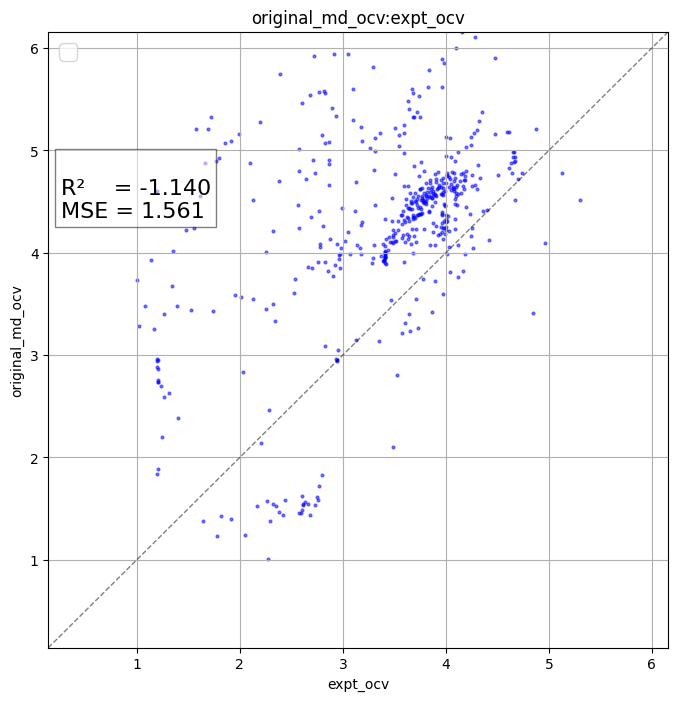

Overall
R² Score: -1.1397294223324028
MSE: 1.561191254126316

Test
R² Score: -0.8031986800903224
MSE: 0.9586770182653059


In [10]:
if self_define_train_test:
    train_name, test_name = train_test_split(df_data["name"].unique(), test_size=0.2, random_state = random_seed)
    train_idx = df_data['name'].isin(train_name)
    test_idx = df_data['name'].isin(test_name)
    X_train = X[train_idx]
    X_test = X[test_idx]
    y_train = df_data[target_column_name][train_idx]
    y_test = df_data[target_column_name][test_idx]

else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_proportion, random_state=43)

if using_primary_as_training:
    name = [primary_column_name + ':'+ target_column_name,target_column_name,primary_column_name]
fig_0 = plot_scatter(y,X[primary_column_name],name=name)       
print('Overall')        
evaluation(X[primary_column_name],y)
print('\nTest')
evaluation(X_test[primary_column_name],y_test)

In [11]:
test_name

array(['Li2FeP2S6', 'Li0.5Mn0.5Ti2(PO4)3', 'LiTi2(PO4)3',
       'LiNi0.5Co0.2Mn0.3O2', 'LiNiO2', 'Li2MnO3', 'LiNi0.9Co0.1O2',
       'LiNi0.6Co0.2Mn0.2O2', 'LiCoO2'], dtype=object)

plot_scatter


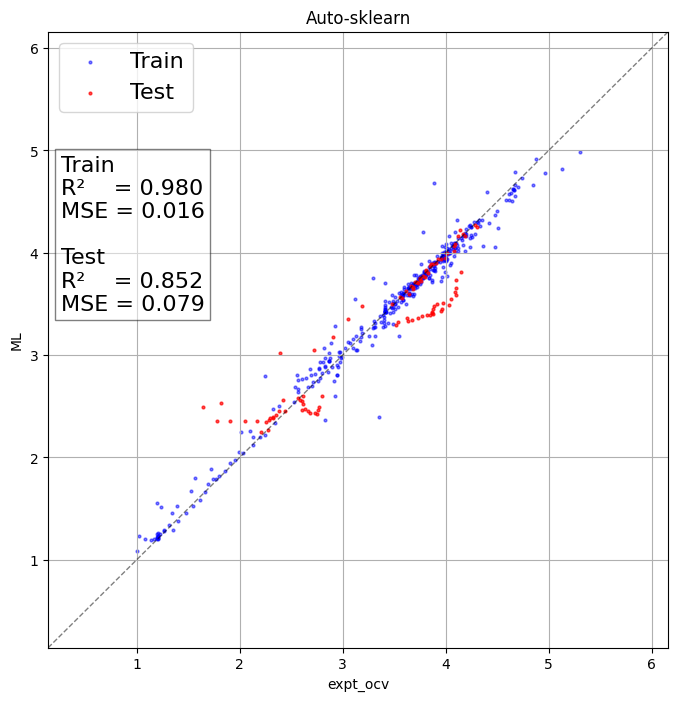

random seed: 461 
total time: 120 
per run time: 15


In [12]:
total_result = {}

time_left_for_this_task = 120
per_run_time_limit = 15

#for random_seed in range(460,500):
time_result = {}
train_name, test_name = train_test_split(df_data["name"].unique(), test_size=0.2, random_state = random_seed)
train_idx = df_data['name'].isin(train_name)
test_idx = df_data['name'].isin(test_name)
X_train = X[train_idx]
X_test = X[test_idx]
y_train = df_data[target_column_name][train_idx]
y_test = df_data[target_column_name][test_idx]

#for time_left_for_this_task in range(110,150,10):
automl = autosklearn.regression.AutoSklearnRegressor(
    memory_limit=8192,
    time_left_for_this_task = time_left_for_this_task,
    per_run_time_limit = per_run_time_limit,
)
automl.fit(X_train, y_train)

# print(automl.leaderboard())
# pprint(automl.show_models(), indent=4)

train_predictions = automl.predict(X_train)
test_predictions = automl.predict(X_test)
all_prediction = automl.predict(X)
df_data['prediction'] = all_prediction
#evaluation(test_predictions,y_test)
name = ['Auto-sklearn',target_column_name,'ML']

adc_fig = plot_scatter(y_train,train_predictions,y_test,test_predictions,name = name,label=['Train','Test'])

print('random seed:',random_seed,'\ntotal time:',time_left_for_this_task,'\nper run time:',per_run_time_limit)

#r2 = r2_score(y_test, test_predictions)

#time_result[time_left_for_this_task] = r2

#total_result[random_seed] = time_result



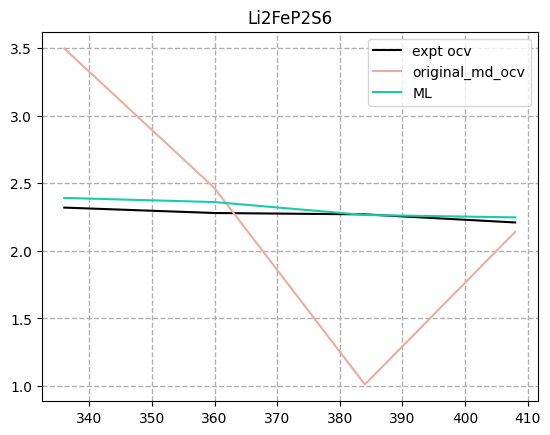

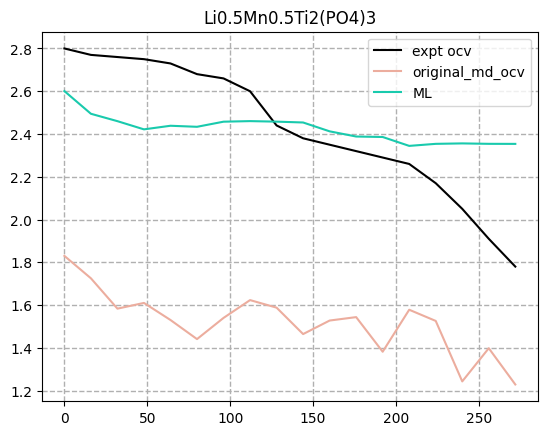

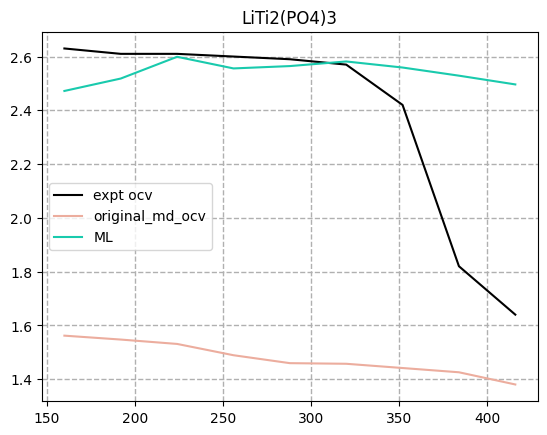

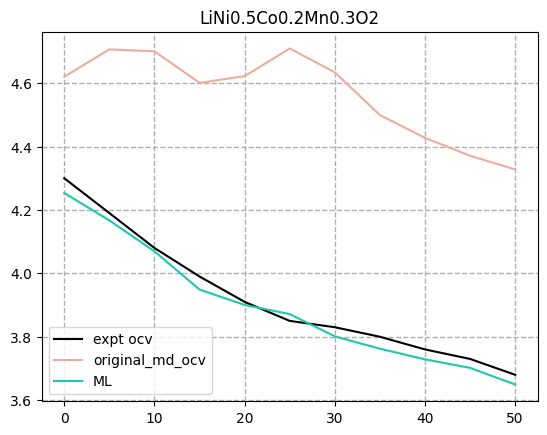

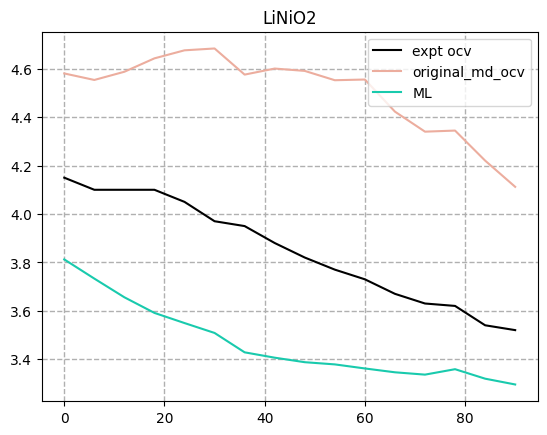

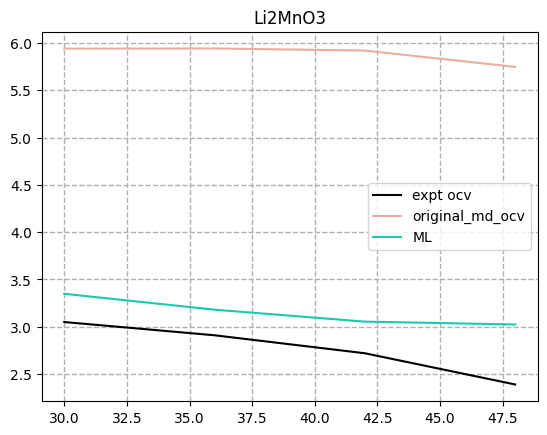

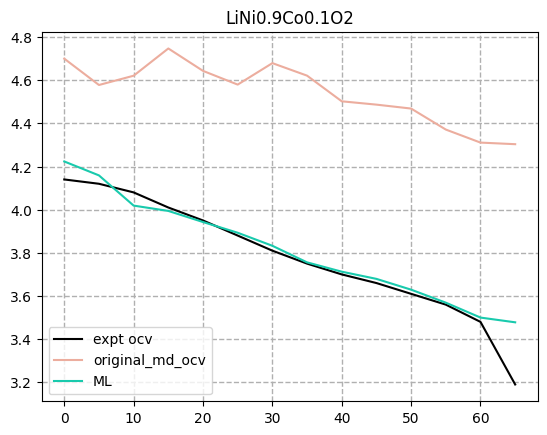

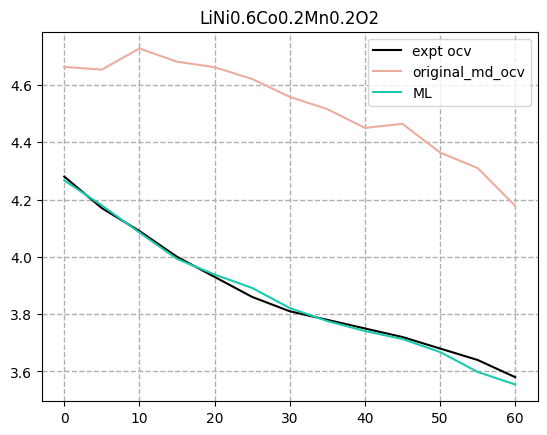

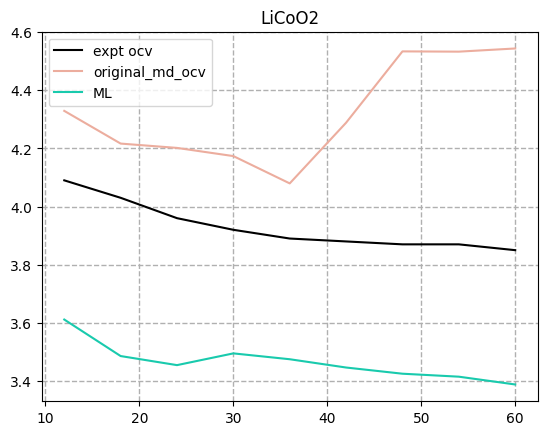

In [13]:
# ocvplot：
test_fig_dic = {}
for moleculer in test_name:
    df_selected = df_data[df_data['name']==moleculer]

    test_fig = plt.figure()
    plt.title(moleculer)
    plt.grid(linewidth=1,linestyle='--')
    plt.plot(df_selected['Li_num'],df_selected['expt_ocv'],label='expt ocv',c='#000000')
    plt.plot(df_selected['Li_num'],df_selected['original_md_ocv'],label='original_md_ocv',c='#ecad9e')
    plt.plot(df_selected['Li_num'],df_selected['prediction'],label='ML',c='#19CAAD')
    plt.legend()

    test_fig_dic[moleculer] = test_fig


In [14]:
# save the figure   

fig_0.savefig(save_dir_path+'0_before_delta.jpg')
adc_fig.savefig(save_dir_path+'2_adc.jpg')

for idx,moleculer in enumerate(test_name):
    test_fig_dic[moleculer].savefig(save_dir_path+'test_'+str(idx)+'.jpg')


In [15]:
import yaml
import os

yaml_data = {
    "description": "OCV result analysis",
    "images": [
        f"/static/data/{proj_theme}/0_before_delta.jpg",
        f"/static/data/{proj_theme}/2_adc.jpg",]
        + [f"/static/data/{proj_theme}/test_{idx}.jpg" for idx in range(len(test_name))],
    "notes": [
        "Before Delta Plot. The x-axis is the original MD OCV value, and the y-axis is the experimental OCV value.",
        "Auto Delta Correction Plot",
    ]
}


with open(os.path.join(save_dir_path, f"config.yaml"), "w", encoding="utf-8") as f:
    yaml.dump(yaml_data, f, allow_unicode=True)
